In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [94]:
df = pd.read_csv("./flattened_wildfire_data.csv")
df_clean = df[df["Mean_confidence"] < 95 ]  # or select manually

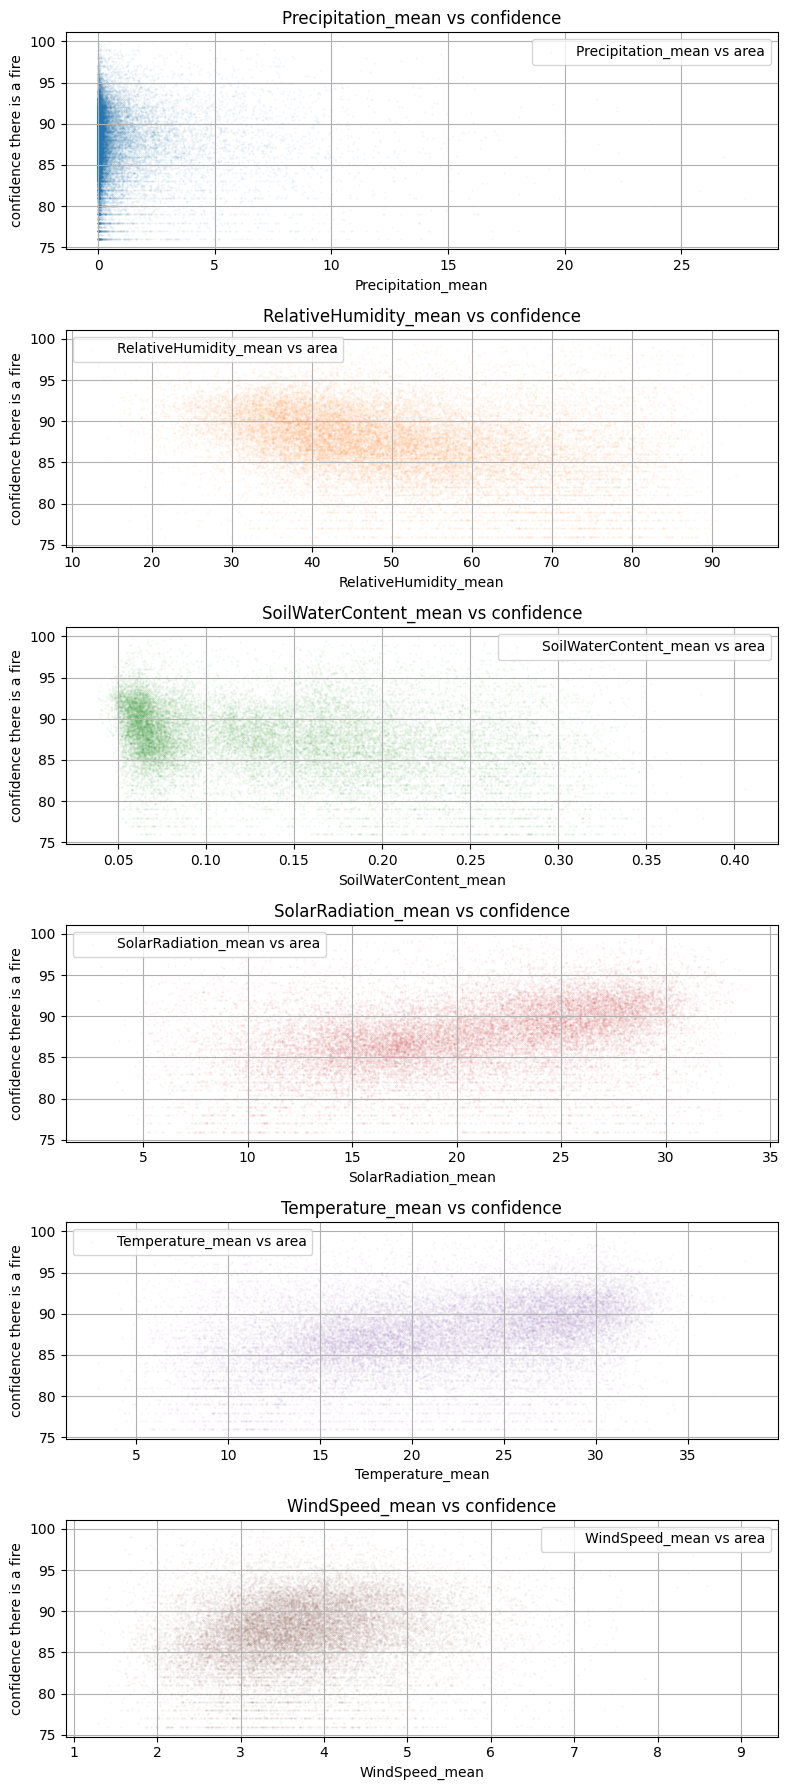

In [16]:
df = pd.read_csv("./flattened_wildfire_data.csv")
df = df[df["Mean_confidence"] < 100]
x = df["Mean_confidence"]
columns_to_plot = df.columns[1:]
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(8, 3 * len(columns_to_plot)), sharex=False)

for i, column in enumerate(columns_to_plot):
    axs[i].scatter(df[column], x, label=f"{column} vs area", color=f'C{i % 10}', s=0.1, alpha=0.1)
    axs[i].set_title(f"{column} vs confidence")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('confidence there is a fire')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

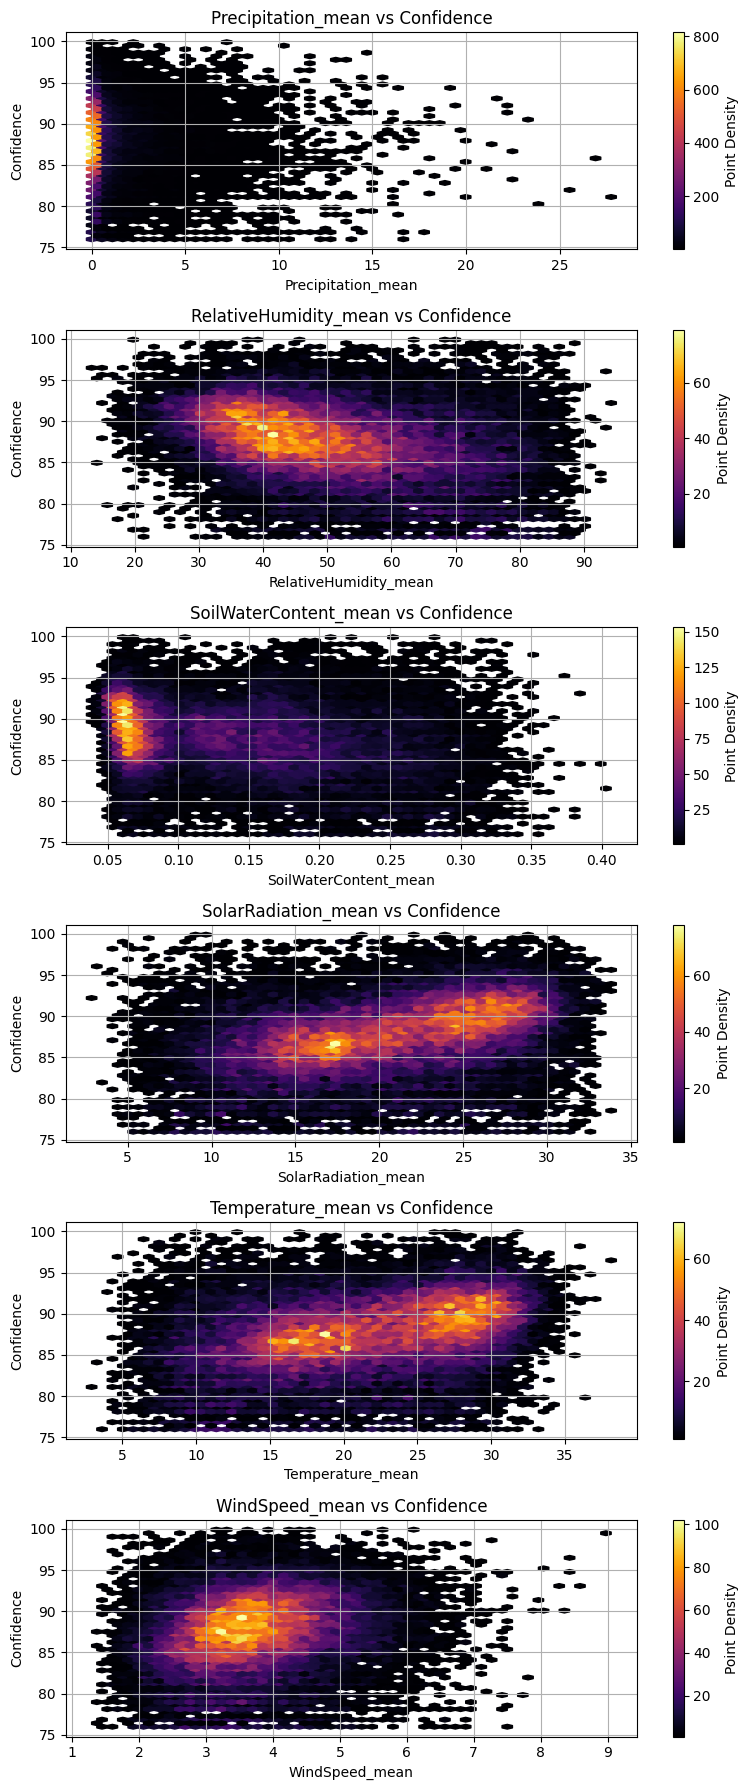

In [17]:
# Load and clean data
df = pd.read_csv("./flattened_wildfire_data.csv")
df = df[df["Mean_confidence"] < 100].dropna(subset=['Mean_confidence'])

columns_to_plot = df.columns[1:]
x = df["Mean_confidence"]

fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(8, 3 * len(columns_to_plot)), sharex=False)

if len(columns_to_plot) == 1:
    axs = [axs]

for i, column in enumerate(columns_to_plot):
    x_vals = df[column]
    y_vals = x

    # Drop NaNs
    mask = ~x_vals.isna() & ~y_vals.isna()
    x_vals = x_vals[mask]
    y_vals = y_vals[mask]

    hb = axs[i].hexbin(x_vals, y_vals, gridsize=50, cmap='inferno', mincnt=1)
    axs[i].set_title(f"{column} vs Confidence")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Confidence")
    axs[i].grid(True)
    fig.colorbar(hb, ax=axs[i], label='Point Density')

plt.tight_layout()
plt.show()


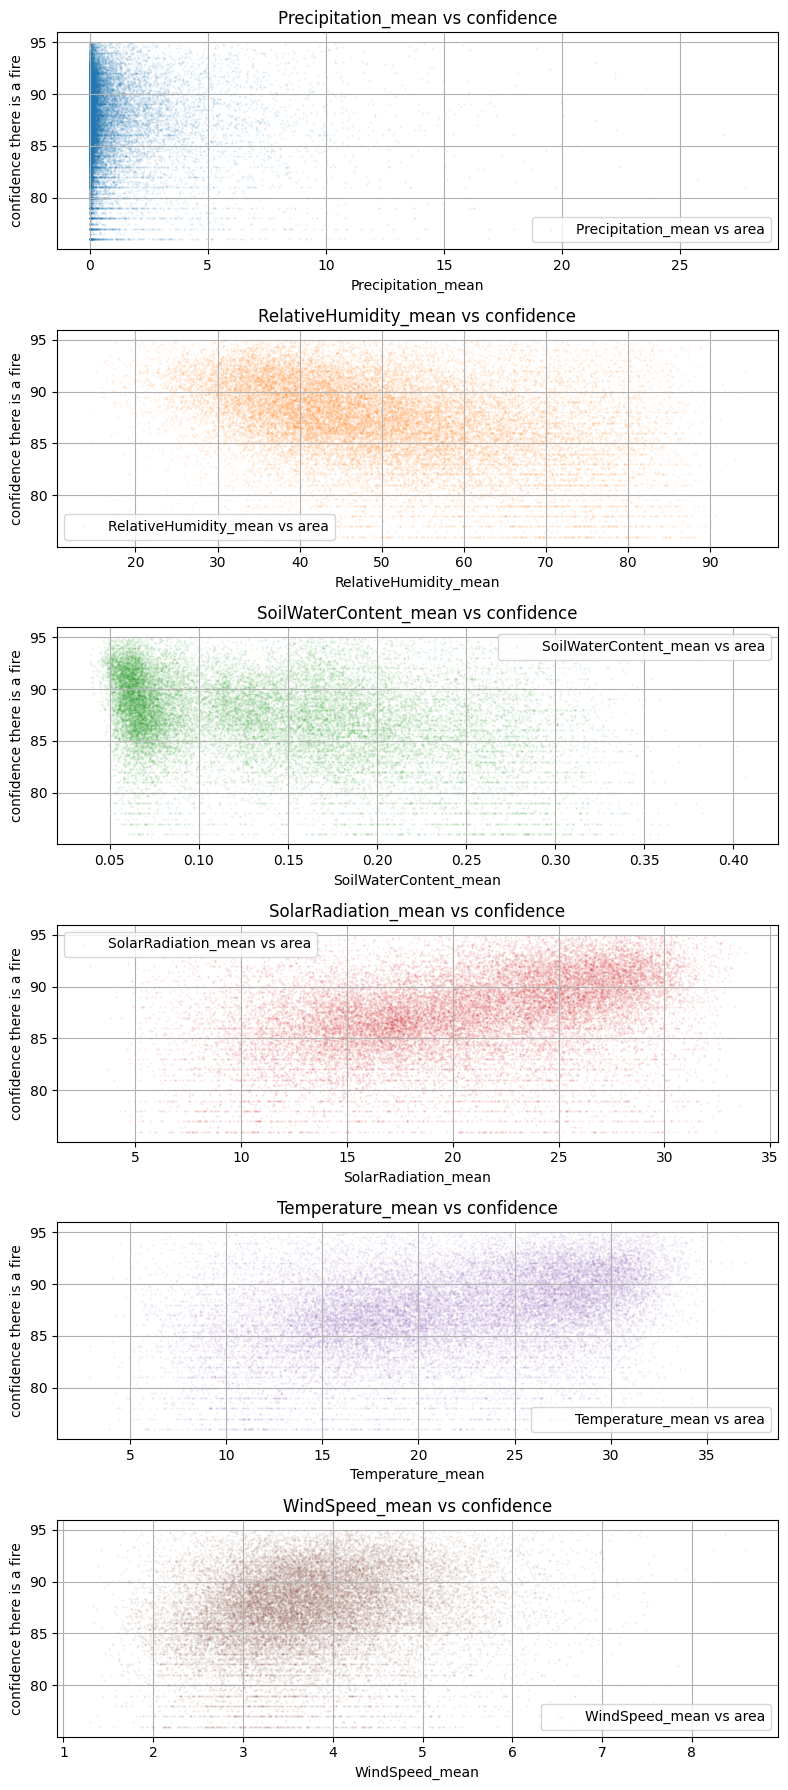

In [56]:
x = df_clean["Mean_confidence"]
columns_to_plot = df_clean.columns[1:]
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(8, 3 * len(columns_to_plot)), sharex=False)

for i, column in enumerate(columns_to_plot):
    axs[i].scatter(df_clean[column], x, label=f"{column} vs area", color=f'C{i % 10}', alpha=0.1, s=0.3)
    axs[i].set_title(f"{column} vs confidence")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('confidence there is a fire')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

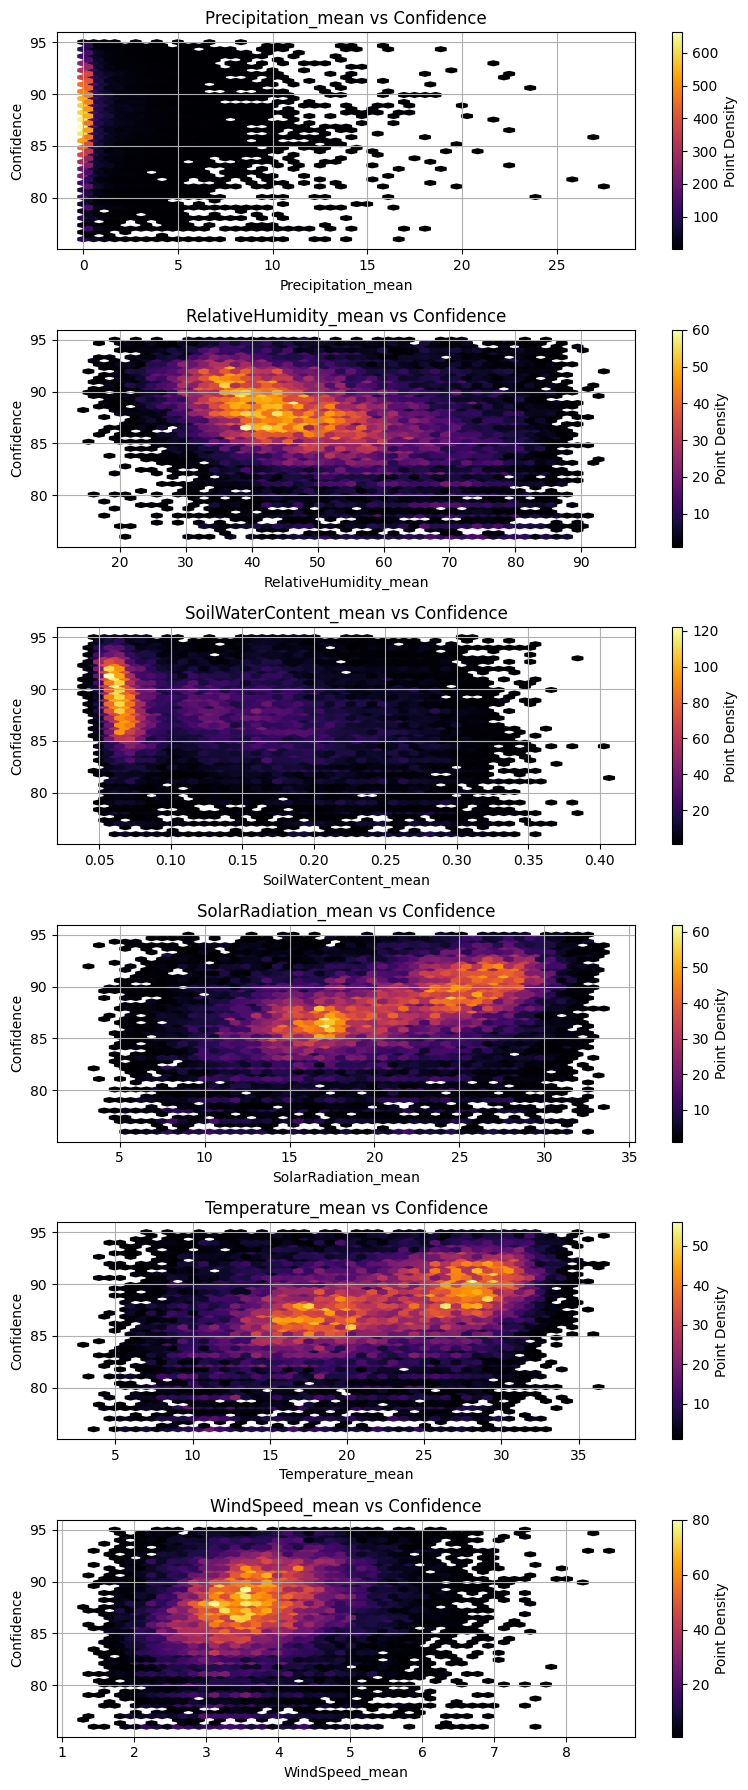

In [58]:
columns_to_plot = df_clean.columns[1:]
x = df_clean["Mean_confidence"]

fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(8, 3 * len(columns_to_plot)), sharex=False)

if len(columns_to_plot) == 1:
    axs = [axs]

for i, column in enumerate(columns_to_plot):
    x_vals = df_clean[column]
    y_vals = x

    # Drop NaNs
    mask = ~x_vals.isna() & ~y_vals.isna()
    x_vals = x_vals[mask]
    y_vals = y_vals[mask]

    hb = axs[i].hexbin(x_vals, y_vals, gridsize=50, cmap='inferno', mincnt=1)
    axs[i].set_title(f"{column} vs Confidence")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Confidence")
    axs[i].grid(True)
    fig.colorbar(hb, ax=axs[i], label='Point Density')

plt.tight_layout()
plt.show()

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['Precipitation_mean', 'RelativeHumidity_mean', 'SoilWaterContent_mean',
            'SolarRadiation_mean', 'Temperature_mean', 'WindSpeed_mean']
X = df_clean[features].copy()
y = df_clean["Mean_confidence"]

# Invert some features to match fire-risk logic
X['RelativeHumidity_mean'] = 1 - X['RelativeHumidity_mean']
X['SoilWaterContent_mean'] = 1 - X['SoilWaterContent_mean']
X['Precipitation_mean'] = 1 - X['Precipitation_mean']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to try
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append((name, mse, r2))

# Display results
print("\nModel Performance Comparison:")


Model Performance Comparison:
Gradient Boosting: MSE=12.61, R²=0.19
Random Forest: MSE=12.83, R²=0.18
Ridge: MSE=13.07, R²=0.16
Linear Regression: MSE=13.07, R²=0.16
Lasso: MSE=15.56, R²=-0.00


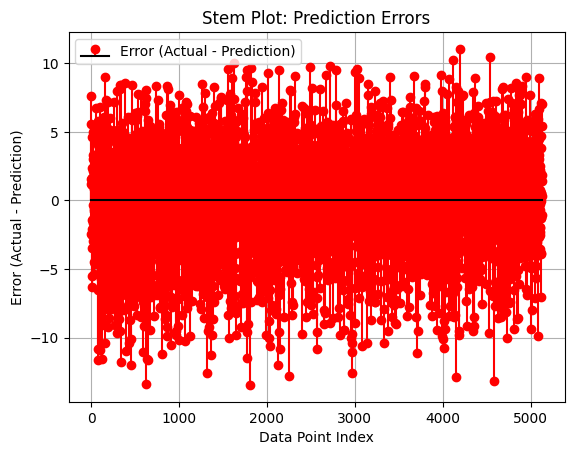

In [113]:
indices = np.arange(len(y_test))  # X-axis positions
errors = y_test - predictions  # Difference between actual and predicted
# Create the stem plot
plt.stem(indices, errors, linefmt="r-", markerfmt="ro", basefmt="k-", label="Error (Actual - Prediction)")

# Labels and title
plt.xlabel("Data Point Index")
plt.ylabel("Error (Actual - Prediction)")
plt.title("Stem Plot: Prediction Errors")
plt.legend()
plt.grid(True)  # Improves readability

plt.show()


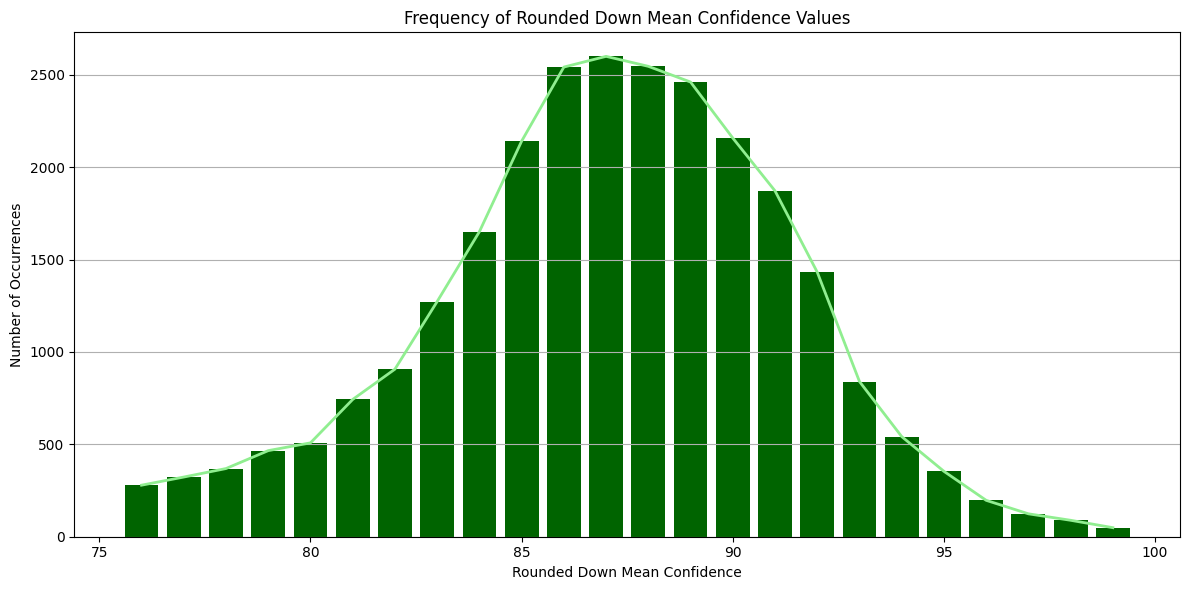

In [121]:
df = pd.read_csv("flattened_wildfire_data.csv")
df = df.dropna(subset=['Mean_confidence'])
df = df[df['Mean_confidence'] < 100]

# Round down (floor) the Mean_confidence values
df['Confidence_Floor'] = df['Mean_confidence'].astype(int)

# Count occurrences of each integer confidence value
value_counts = df['Confidence_Floor'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(value_counts.index, value_counts.values, color='darkgreen')
plt.plot(value_counts.index, value_counts.values, color='lightgreen', linewidth=2)
plt.title('Frequency of Rounded Down Mean Confidence Values')
plt.xlabel('Rounded Down Mean Confidence')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

❌ No GPU found. Using CPU.
Epoch 1/50


C:\Users\jorda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


579/579 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7279.8584 - mae: 85.1812 - val_loss: 5036.0864 - val_mae: 70.8519
Epoch 2/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3988.3262 - mae: 62.5580 - val_loss: 1287.3156 - val_mae: 35.6542
Epoch 3/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 817.3176 - mae: 27.5156 - val_loss: 89.7601 - val_mae: 8.6912
Epoch 4/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52.0624 - mae: 6.2510 - val_loss: 16.7116 - val_mae: 3.3162
Epoch 5/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.5427 - mae: 3.2704 - val_loss: 16.0953 - val_mae: 3.1930
Epoch 6/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.3258 - mae: 3.2201 - val_loss: 16.0946 - val_mae: 3.1953
Epoch 7/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.1410 - mae: 3.1933 - val_loss: 16.0990 - val_mae: 3.1902
Epoch 8/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.2001 - mae: 3.2054 - val_loss: 16.0951 - val_mae: 3.1968
Epoch 9/50
579/579 ━━━━━━━━━━━━━━━━━━

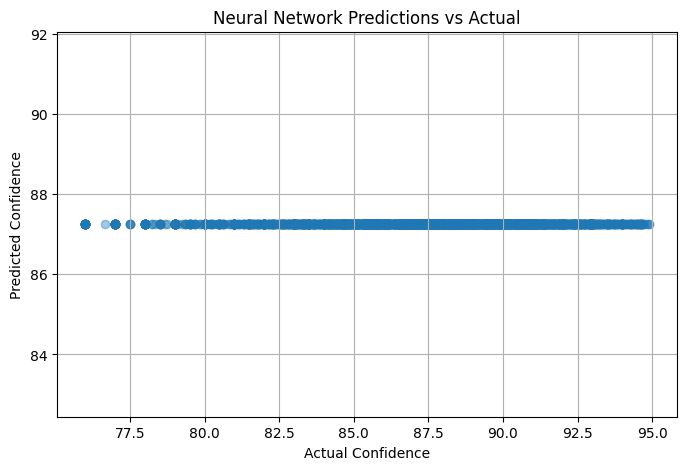

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Check for GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU detected. TensorFlow will use CUDA.")
else:
    print("❌ No GPU found. Using CPU.")

df = pd.read_csv("flattened_wildfire_data.csv")
df = df.dropna(subset=['Mean_confidence'])
df = df[df['Mean_confidence'] < 95]  # remove outliers

y = df['Mean_confidence']
X = df.drop(['Mean_estimated_fire_brightness','Mean_confidence', 'Std_confidence'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
model.save_weights("model_weights.weights.h5")

loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Confidence")
plt.ylabel("Predicted Confidence")
plt.title("Neural Network Predictions vs Actual")
plt.grid(True)
plt.show()

Epoch 0, Loss: 0.5150
Epoch 10, Loss: 0.2451
Epoch 20, Loss: 0.1565
Epoch 30, Loss: 0.2368
Epoch 40, Loss: 0.2696
Epoch 50, Loss: 0.0993
Epoch 60, Loss: 0.4992
Epoch 70, Loss: 0.1679
Epoch 80, Loss: 0.3489
Epoch 90, Loss: 0.3909
Epoch 100, Loss: 0.1346
Epoch 110, Loss: 0.2700
Epoch 120, Loss: 0.2450
Epoch 130, Loss: 0.5314
Epoch 140, Loss: 0.3070
Epoch 150, Loss: 0.1372
Epoch 160, Loss: 0.5947
Epoch 170, Loss: 0.7011
Epoch 180, Loss: 0.6935
Epoch 190, Loss: 0.3518
MSE: 8.16, MAE: 1.94, R²: 0.46


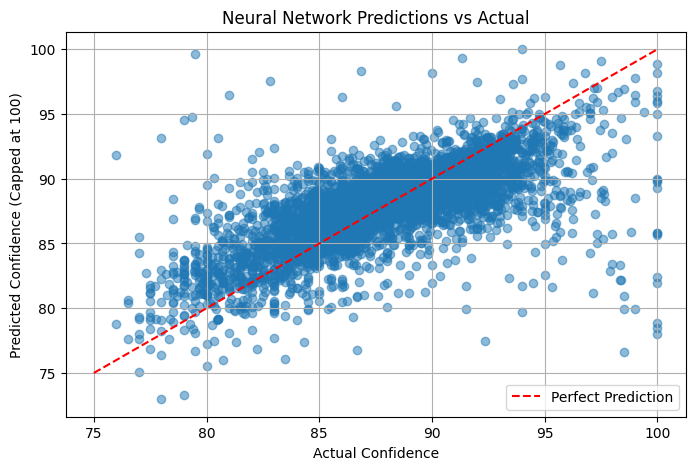

In [13]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. Load your flattened and cleaned dataset
df = pd.read_csv("flattened_wildfire_data.csv")

# 2. Drop irrelevant or non-numeric columns
df = df.select_dtypes(include=["number"]).dropna()

# 3. Separate features and target
X = df.drop("Mean_confidence", axis=1).values
y = df["Mean_confidence"].values.reshape(-1, 1)

# 4. Normalize features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 5. Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

# 6. Train-test split
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

# 7. Define Neural Network
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = RegressionNN(input_dim=X.shape[1])
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 8. Train model
epochs = 200
for epoch in range(epochs):
    model.train()
    for xb, yb in train_loader:
        pred = model(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 9. Evaluate
model.eval()
y_actual = []
y_pred = []
with torch.no_grad():
    for xb, yb in val_loader:
        pred = model(xb)
        y_actual.extend(yb.numpy())
        y_pred.extend(pred.numpy())

# 10. Download weights
torch.save(model.state_dict(), "wildfire_nn_weights1.pth")

# 11. Unscale and cap predictions
y_actual_unscaled = scaler_y.inverse_transform(y_actual)
y_pred_unscaled = scaler_y.inverse_transform(y_pred)
y_pred_capped = [[min(100, val[0])] for val in y_pred_unscaled]

# 12. Print metrics
mse = mean_squared_error(y_actual_unscaled, y_pred_capped)
mae = mean_absolute_error(y_actual_unscaled, y_pred_capped)
r2 = r2_score(y_actual_unscaled, y_pred_capped)
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# 13. Plot
plt.figure(figsize=(8, 5))
plt.plot([75, 100], [75, 100], 'r--', label='Perfect Prediction')
plt.scatter(y_actual_unscaled, y_pred_capped, alpha=0.5)
plt.xlabel("Actual Confidence")
plt.ylabel("Predicted Confidence (Capped at 100)")
plt.title("Neural Network Predictions vs Actual")
plt.grid(True)
plt.legend()
plt.show()


In [208]:
model = RegressionNN(input_dim=X.shape[1])  # Ensure input_dim is the same
model.load_state_dict(torch.load("wildfire_nn_weights125.pth"))
model.eval() 
model.predict

RegressionNN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)